In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


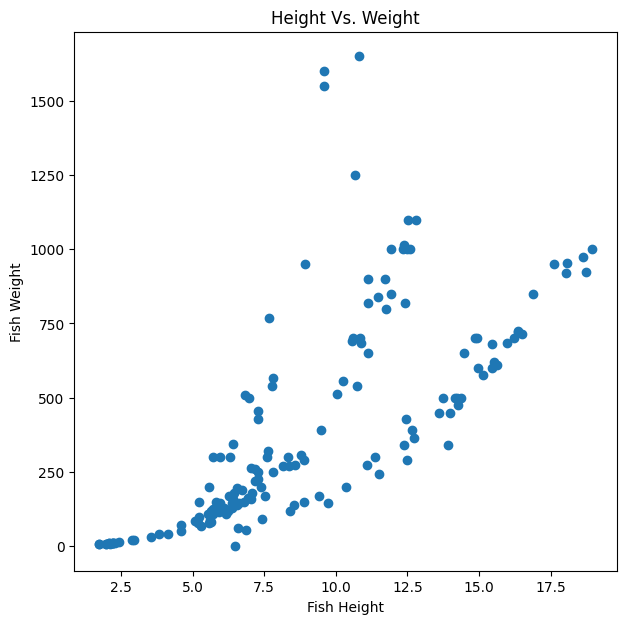

In [6]:
plt.figure(figsize=(7,7))
plt.scatter(x="Height", y="Weight", data=df)
plt.xlabel('Fish Height')
plt.ylabel('Fish Weight')
plt.title('Height Vs. Weight')
plt.show()

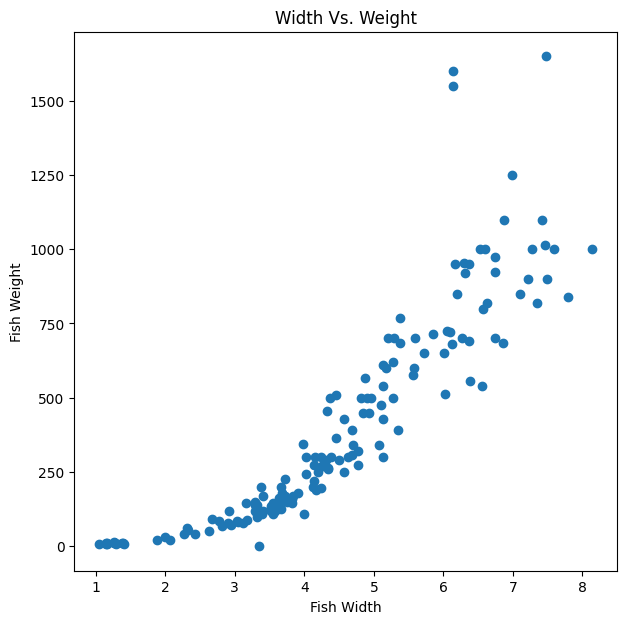

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(x="Width", y="Weight", data=df)
plt.xlabel('Fish Width')
plt.ylabel('Fish Weight')
plt.title('Width Vs. Weight')
plt.show()

<Axes: >

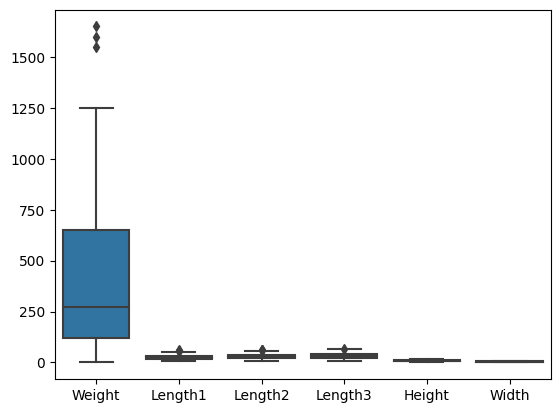

In [8]:
sns.boxplot(data=df) 

In [9]:
df=df.drop(df[df['Weight']>1250].index)

<Axes: >

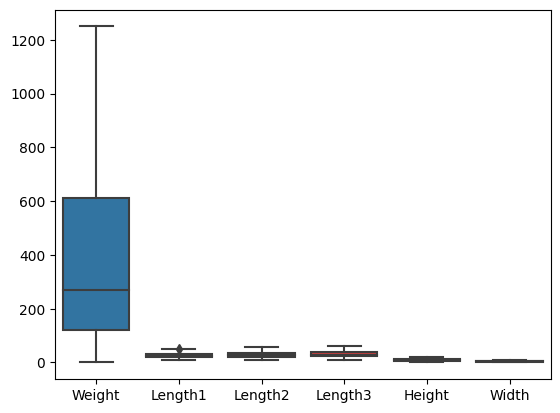

In [10]:
sns.boxplot(data=df) 

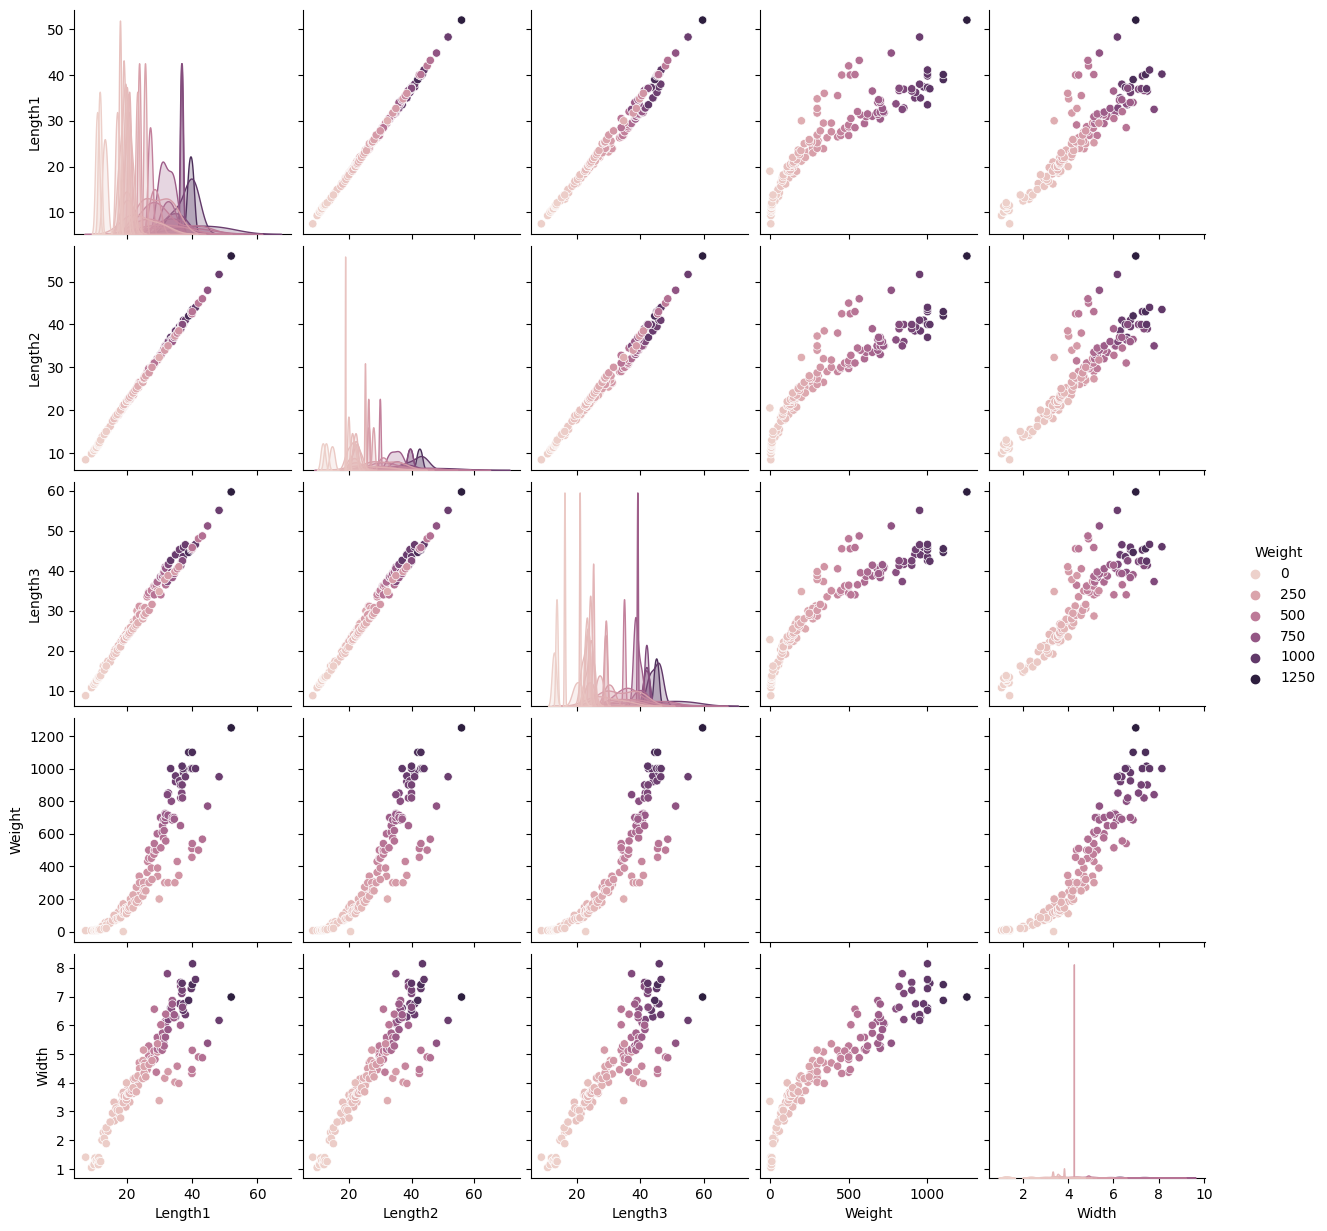

In [11]:
sns.pairplot(df, hue = 'Weight', vars=['Length1', 'Length2', 'Length3', 'Weight', 'Width',])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    object 
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [15]:
X = df.drop(['Species', 'Weight'], axis=1)
y = df['Weight']
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=156)

In [16]:
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
lr.score(X_test, y_test)

0.06349206349206349

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

# Split the data into features (X) and the target (y)
X = df.drop("Weight", axis=1)
y = df["Weight"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()


In [20]:
model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 73.95874688101479
Mean Squared Error: 8508.170483604366
R-squared: 0.9121143978212813


In [22]:
# Example input data for prediction
new_data = pd.DataFrame({
    "Species": ["Bream"],  # Encode the species using the same label encoder
    "Length1": [30.0],
    "Length2": [32.0],
    "Length3": [35.0],
    "Height": [12.0],
    "Width": [6.0]
})

# Encode the species column
new_data["Species"] = label_encoder.transform(new_data["Species"])

# Standardize the input data
new_data = scaler.transform(new_data)

# Make a prediction
predicted_weight = model.predict(new_data)
print("Estimated Weight:", predicted_weight[0])

Estimated Weight: 605.4416860888871


In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle
model = LogisticRegression()
filename = 'model_fish_weight.sav'
pickle.dump(model, open(filename, 'wb'))



In [ ]:
from sklearn.linear_model import LinearRegression
import pickle
model = LinearRegression()
filename = 'model_fish_weight_linear.sav'
pickle.dump(model, open(filename, 'wb'))